# Practical Session of Week 4 - Review + Correlation between Variables
This notebook contains the exercises and concepts of **Data Science Practice discipline**.  
Throughout the notebook, we will:

- Review key concepts of quantitative features in rectangular data.
- Solve guided examples and exercises to consolidate learning.

The purpose of this notebook is to consolidate knowledge previously discussed and deepen the EDA techniques through knowledge of associations/correlations between variables.

# Part 1: Review
In this section, we will explore fundamental concepts of quantitative features in rectangular data.

- Central Tendency: Mean, Median, Mode
- Dispersion: Range, IQR, Variance, STD
- Frequency Tables and Categorical Feature Summaries
- Notion of A Distribution
- Population vs Sample

# Part 2: Linear Correlations
- Correlation between variables
- Dispersion charts

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Review for the next week test

### Exercise 1
Create a DataFrame called `df_notas` with 50 rows, containing a `grade` column with random integer values **between 0 and 20**.

In [2]:
np.random.seed(42)
df_notas = pd.DataFrame({'grades': np.random.randint(0, 21, 50)})
df_notas.head()

,grades
0,6
1,19
2,14
3,10
4,7


### Exercise 2
Add to DataFrame `df_notas` A column called `status` that classifies each student as `Pass` if the **grade is > = 10** or `Fail` otherwise. Try to do this without using loops with `np.where`.

In [3]:
# add status column
df_notas['status'] = np.where(df_notas['grades'] >= 10, 'Pass', 'Fail')
df_notas.head()

,grades,status
0,6,Fail
1,19,Pass
2,14,Pass
3,10,Pass
4,7,Fail


In [5]:
df_notas['status'].value_counts()

status
Pass    29
Fail    21
Name: count, dtype: int64

<Axes: xlabel='status'>

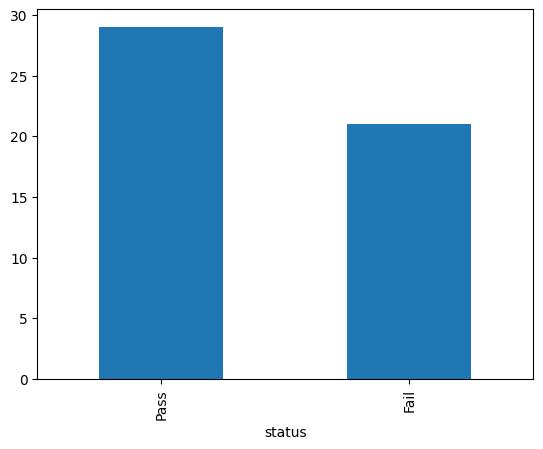

In [4]:
df_notas['status'].value_counts().plot(kind='bar')

### Exercise 3
Calculate the average, median and quartis (q1, q2, q3) of the grades.

In [6]:
df_notas.describe()

,grades
count,50.000000
mean,10.960000
std,6.343758
min,0.000000
25%,6.000000
50%,11.000000
75%,17.000000
max,20.000000


### Exercise 4
Create a histogram of grades with 10 bins.

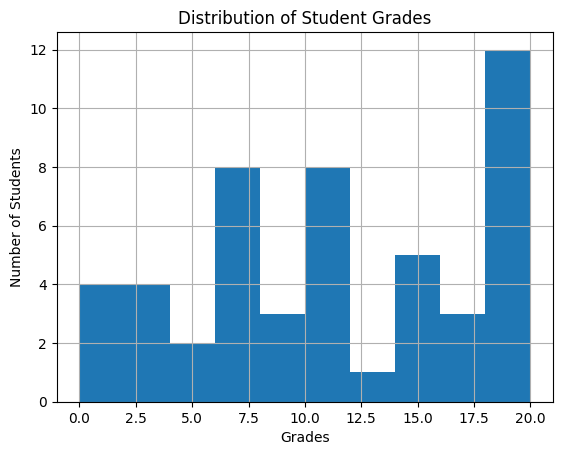

In [9]:
df_notas.hist(bins=10)
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.title('Distribution of Student Grades')
plt.show()

### Exercise 5
Create a grades boxplot to analyze the distribution.

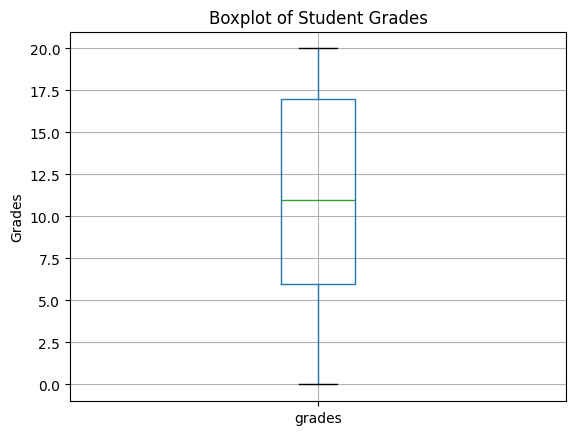

In [10]:
# grades boxplot to analyze distribution
df_notas.boxplot(column='grades')
plt.ylabel('Grades')
plt.title('Boxplot of Student Grades')
plt.show()

### Exercise 6
Create a DataFrame `df_salarios` with 100 random salaries between 1200 and 8000.

In [12]:
np.random.seed(42)
df_salarios = pd.DataFrame({'salary': np.random.randint(1200, 8001, 100)})
df_salarios.head()

,salary
0,2060
1,6590
2,6426
3,6391
4,4972


### Exercise 7
Add to DataFrame `df_salarios` a `salary_range` column that classifies each salary in:
`Low` (<Q1), `Medium` (between Q1 and Q3) and `High` (> Q3).

In [ ]:
# Calculate quartiles
q1 = df_salarios['salary'].quantile(0.25)
q3 = df_salarios['salary'].quantile(0.75)

# using loc to classify Salaries according to quartiles intervals
df_salarios.loc[df_salarios['salary'] < q1, 'salary_range'] = 'Low'
df_salarios.loc[(df_salarios['salary'] >= q1) & (df_salarios['salary'] <= q3), 'salary_range'] = 'Medium'
df_salarios.loc[df_salarios['salary'] > q3, 'salary_range'] = 'High'
df_salarios

,salary,salary_level,salary_range
0,2060,Low,Low
1,6590,High,High
2,6426,High,High
3,6391,High,High
4,4972,Medium,Medium
...,...,...,...
95,2216,Low,Low
96,7639,High,High
97,1537,Low,Low
98,2078,Low,Low


In [16]:
df_salarios['salary_range'].value_counts()

salary_range
Medium    50
Low       25
High      25
Name: count, dtype: int64

**Alternatively, you can use `pd.cut`**

In [ ]:
# Calculate quartiles
q1 = df_salarios['salary'].quantile(0.25)
q3 = df_salarios['salary'].quantile(0.75)

# pd.cut to classify Salaries
df_salarios['salary_range'] = pd.cut(df_salarios['salary'], 
                                      bins=[0, q1, q3, np.inf], 
                                      labels=['Low', 'Medium', 'High'])

df_salarios


,salary,salary_level
0,2060,Low
1,6590,High
2,6426,High
3,6391,High
4,4972,Medium
...,...,...
95,2216,Low
96,7639,High
97,1537,Low
98,2078,Low


### Exercise 8
Create a histogram and a boxplot of salaries.

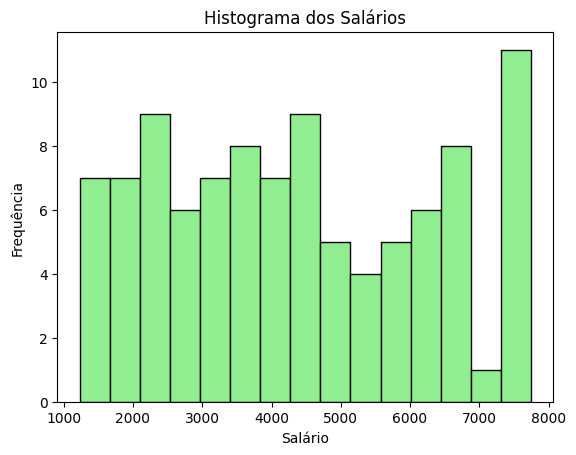

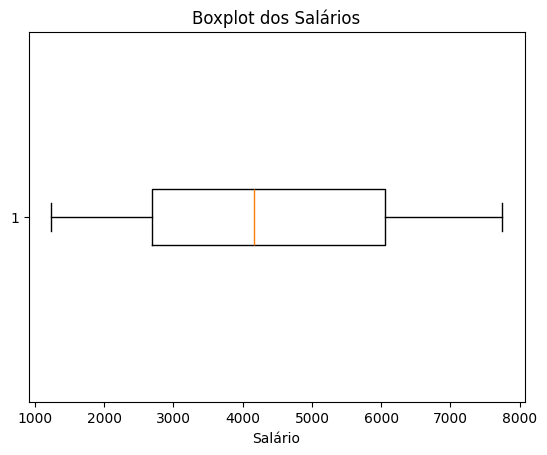

### Exercise 9
Create two DataFrames: `df_clients` (with `client_id` and `name`) and` df_purchases` (with `client_id` and `value` of purchase). Finally, merge the DataFrames (`pd.merge`).

In [17]:
df_clients = pd.DataFrame({
    'client_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [28, 34, 29, 42, 23]})

df_clients

,client_id,name,age
0,1,Alice,28
1,2,Bob,34
2,3,Charlie,29
3,4,David,42
4,5,Eva,23


In [18]:
df_purchases = pd.DataFrame({
    'client_id': [1, 2, 1, 3, 4, 2, 5, 3],
    'value': [250, 450, 300, 150, 500, 200, 700, 100]})

df_purchases

,client_id,value
0,1,250
1,2,450
2,1,300
3,3,150
4,4,500
5,2,200
6,5,700
7,3,100


In [19]:
df_merged = pd.merge(df_clients, df_purchases, on='client_id', how='inner')
df_merged

,client_id,name,age,value
0,1,Alice,28,250
1,1,Alice,28,300
2,2,Bob,34,450
3,2,Bob,34,200
4,3,Charlie,29,150
5,3,Charlie,29,100
6,4,David,42,500
7,5,Eva,23,700


**Alternatively, you can do like that**

In [20]:
df_merged = df_clients.merge(df_purchases, on='client_id', how='inner')
df_merged

,client_id,name,age,value
0,1,Alice,28,250
1,1,Alice,28,300
2,2,Bob,34,450
3,2,Bob,34,200
4,3,Charlie,29,150
5,3,Charlie,29,100
6,4,David,42,500
7,5,Eva,23,700


### Exercise 10
In the resulting DataFrame of the merge, create a new column called `with_discount` Apply **10% discount** to the purchase value.

In [26]:
df_merged['with_discount'] = df_merged['value'] * 0.9
df_merged

,client_id,name,age,value,with_discount
0,1,Alice,28,250,225.0
1,1,Alice,28,300,270.0
2,2,Bob,34,450,405.0
3,2,Bob,34,200,180.0
4,3,Charlie,29,150,135.0
5,3,Charlie,29,100,90.0
6,4,David,42,500,450.0
7,5,Eva,23,700,630.0


## Part 2 - Linear Correlations

In [ ]:
# install scipy if it is not installed already
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 14.8 MB/s  0:00:01 eta 0:00:01


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Exercise 1
Create two x and y vectors with 100 data points (`y = 2x + noise`). Scatter plot the data.

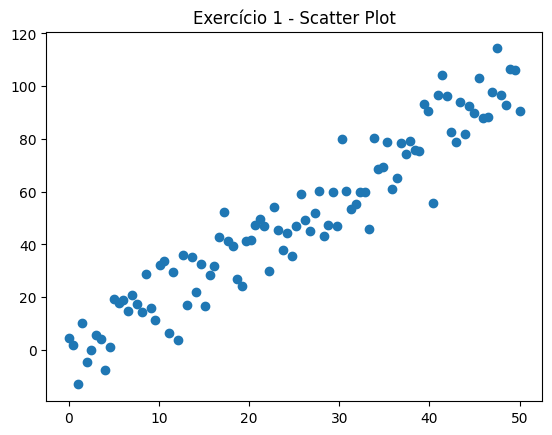

In [30]:
x = np.linspace(0, 50, 100)
y = 2*x + np.random.normal(0, 10, 100)
plt.scatter(x, y)
plt.title("Exercício 1 - Scatter Plot")
plt.show()

### Exercise 2
Use seaborn.Pairplot to view relationships between 4 random variables.

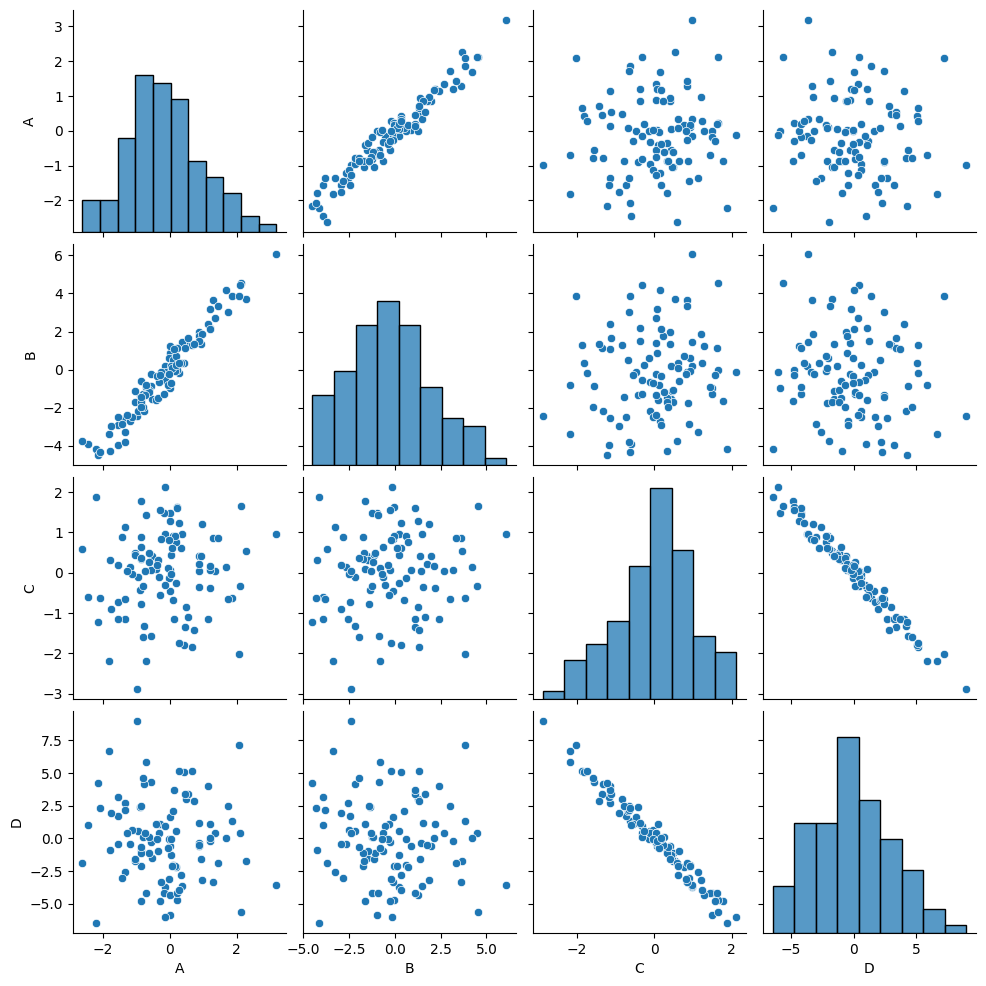

In [31]:
df = pd.DataFrame(np.random.randn(100, 4), columns=list("ABCD"))
# Create A Linear Relation Between A And B
df["B"] = df["A"] * 2 + np.random.normal(0, 0.5, 100)
# Create Linear Relation Between C and D
df["D"] = df["C"] * -3 + np.random.normal(0, 0.5, 100)
sns.pairplot(df)

### Exercise 3
Generate a linear association (`y = 3x + noise`) and **scatter plott with trend line**.

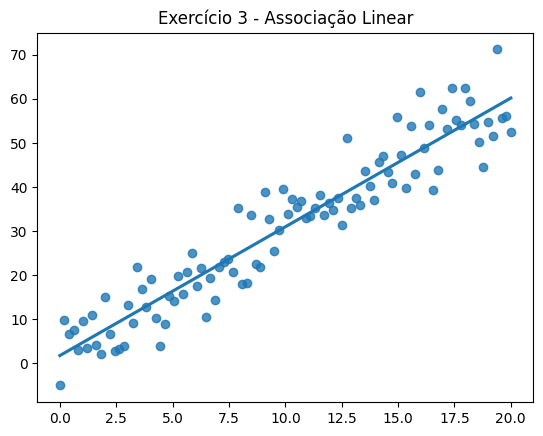

In [32]:
x = np.linspace(0, 20, 100)
y = 3*x + np.random.normal(0, 5, 100)
sns.regplot(x=x, y=y, ci=None)
plt.title("Exercício 3 - Associação Linear")
plt.show()

### Exercise 4
Generate a nonlinear association (`y = x^2 + noise`) and a scatter plot.

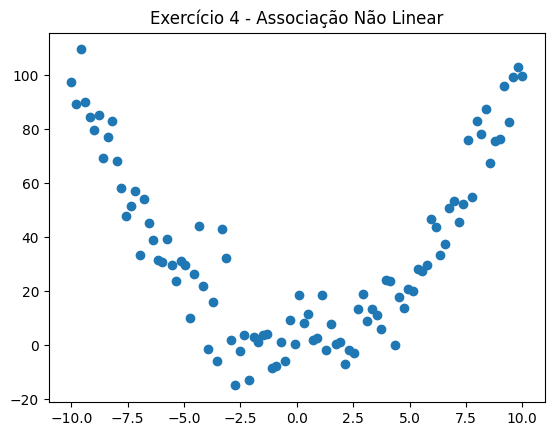

In [33]:
x = np.linspace(-10, 10, 100)
y = x**2 + np.random.normal(0, 10, 100)
plt.scatter(x, y)
plt.title("Exercício 4 - Associação Não Linear")
plt.show()

### Exercise 5
Calculate **Pearson's correlation** between x and y of **Exercise 3**. Explain the result.

In [ ]:
pearson_corr = stats.pearsonr(x, y)
print(pearson_corr)

# we can conclude that there is no significant linear correlation between x and y
# because the correlation coefficient is very close to 0
# and the p-value is much greater than 0.05 which indicates that we fail to reject the null hypothesis of no correlation.

PearsonRResult(statistic=np.float64(0.01075767776715314), pvalue=np.float64(0.9154019864542098))


### Exercise 6
Calculate the `Spearman Correlation` between X and Y of `Exercise 4`. Explain the result.

In [ ]:
spearman_corr = stats.spearmanr(x, y)
spearman_corr
# given the result SignificanceResult(statistic=np.float64(-0.0016081608160816079), pvalue=np.float64(0.987330580098831)) we can also conclude that there is no significant monotonic correlation between x and y
# because the correlation coefficient is very close to 0
# and the p-value is much greater than 0.05.
# in simple terms when the p-value is high, it means that the observed correlation could easily occur by random chance,
# so we cannot confidently say there is a real association between the variables.

SignificanceResult(statistic=np.float64(-0.0016081608160816079), pvalue=np.float64(0.987330580098831))

### Exercise 7
Compare **Pearson** and **Spearman** in quadratic data.

In [36]:
x = np.linspace(-5, 5, 100)
y = x**2
pearson = stats.pearsonr(x, y)
spearman = stats.spearmanr(x, y)
pearson, spearman
# Explain The Results
# In Quadratic Data, Pearson Correlation may be Low or Zero Because It measures Linear Relationships, While Spearman Correlation Captures The Monotonic Relationship, Resulting in A Higher Value.

(PearsonRResult(statistic=np.float64(-6.938893903907228e-18), pvalue=np.float64(1.0)),
 SignificanceResult(statistic=np.float64(-0.002646479021386217), pvalue=np.float64(0.9791519704231377)))

### Exercise 8
Simulate data with **weak correlation (high noise)**. Show scatter plot.

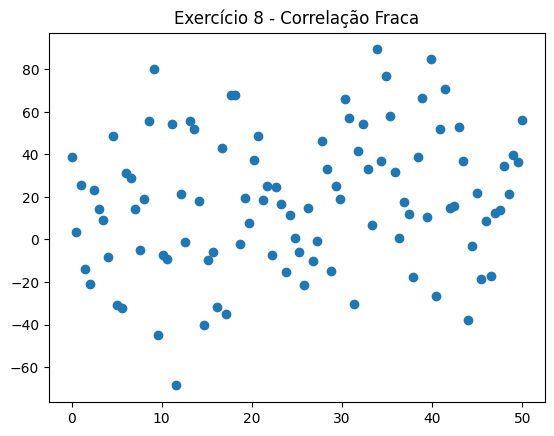

In [37]:
x = np.linspace(0, 50, 100)
y = 0.5*x + np.random.normal(0, 30, 100)
plt.scatter(x, y)
plt.title("Exercício 8 - Correlação Fraca")
plt.show()

### Exercise 9
Simulate data with **moderate correlation**.

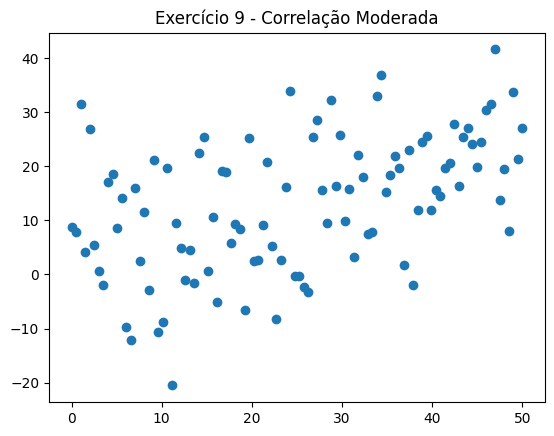

In [38]:
x = np.linspace(0, 50, 100)
y = 0.5*x + np.random.normal(0, 10, 100)
plt.scatter(x, y)
plt.title("Exercício 9 - Correlação Moderada")
plt.show()

### Exercise 10
Simulate data with **strong correlation**.

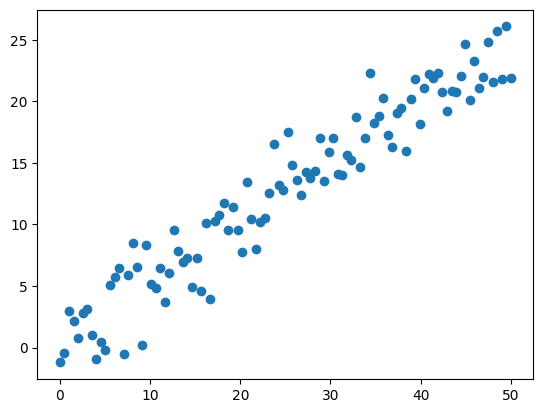

In [39]:
x = np.linspace(0, 50, 100)
y = 0.5*x + np.random.normal(0, 2, 100)
plt.scatter(x, y)

### Exercise 11
Test significance of **Pearson's correlation** in data with 20 data points.

In [ ]:
x = np.linspace(0, 10, 20)
y = 2*x + np.random.normal(0, 5, 20)
stats.pearsonr(x, y)

# given spearman_corr = stats.spearmanr(x, y)
spearman_corr
# we can conclude that there is a significant linear correlation between x and y
# because the correlation coefficient is moderately high (0.66)
# and the p-value is less than 0.05 which indicates that we reject the null hypothesis of no correlation.

PearsonRResult(statistic=np.float64(0.6608581225382373), pvalue=np.float64(0.001512948327507025))

### Exercise 12
Test significance of **Pearson's correlation** in data with 200 data points.

In [ ]:
x = np.linspace(0, 10, 200)
y = 0.2*x + np.random.normal(0, 5, 200)
stats.pearsonr(x, y)

# we can conclude that there is a weak linear correlation between x and y
# the correlation coefficient is low (0.158) but the p-value is less than 0.05 which indicates that we reject the null hypothesis of no correlation.

PearsonRResult(statistic=np.float64(0.15830872170829252), pvalue=np.float64(0.025160599238270267))

### Exercise 13
Create scatter plot with categories.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.DataFrame({
    "x": np.random.randn(100),
    "y": np.random.randn(100),
    "grupo": np.random.choice(["A", "B"], 100)
})


### Exercise 14
Show correlation matrix with Seaborn Heatmap.

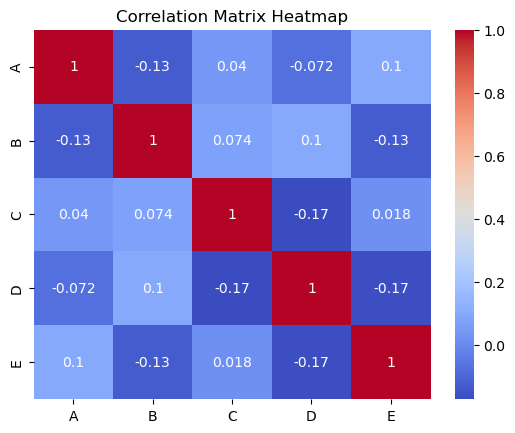

In [ ]:
df = pd.DataFrame(np.random.randn(100, 5), columns=list("ABCDE"))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

### Exercise 15
Check non-linear correlation.

In [ ]:
# check non-linear correlation


(PearsonRResult(statistic=np.float64(-0.07589466694797184), pvalue=np.float64(0.4529607482441908)),
 SignificanceResult(statistic=np.float64(-0.07504350435043504), pvalue=np.float64(0.45805859611033717)))

### Exercise 16
Based on what we have learned above, analyze the `Auto.csv` dataset and search for interesting correlations.

In [ ]:
# loading dataset and displaying first 5 rows
df = pd.read_csv('./Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# checking the data types of each column and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [ ]:
# all columns
df.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [13]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['mpg',
 'cylinders',
 'displacement',
 'weight',
 'acceleration',
 'year',
 'origin']

In [ ]:
# lets check the correlations
df[numeric_columns].corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


<Axes: >

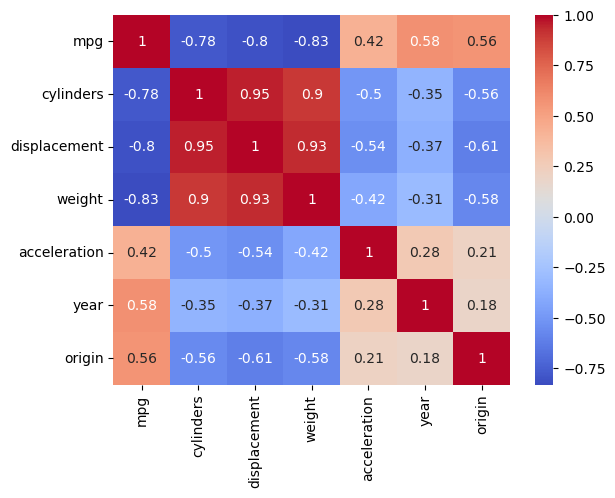

In [ ]:
# visualizing the correlation matrix makes easier to understand
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')

### Some interesting correlations tha twe can see are:

<Axes: xlabel='weight', ylabel='cylinders'>

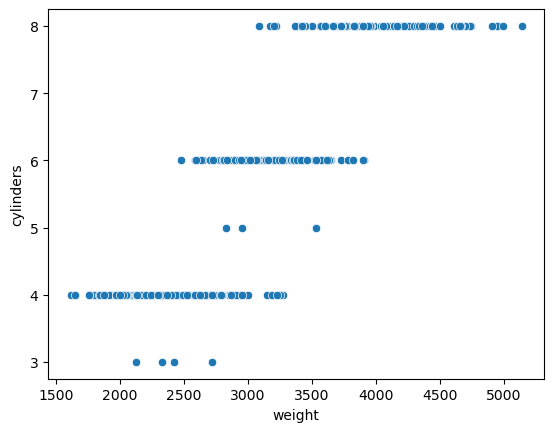

In [17]:
# correlation between weight and cylinders
sns.scatterplot(data=df, x='weight', y='cylinders')

<Axes: xlabel='cylinders', ylabel='displacement'>

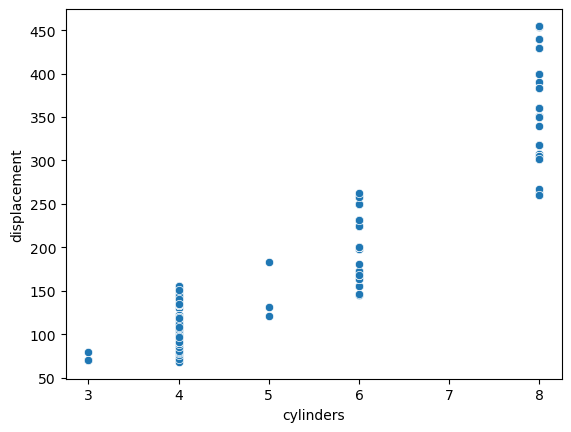

In [18]:
# correlation between cylinders and displacement
sns.scatterplot(data=df, x='cylinders', y='displacement')

<Axes: xlabel='mpg', ylabel='displacement'>

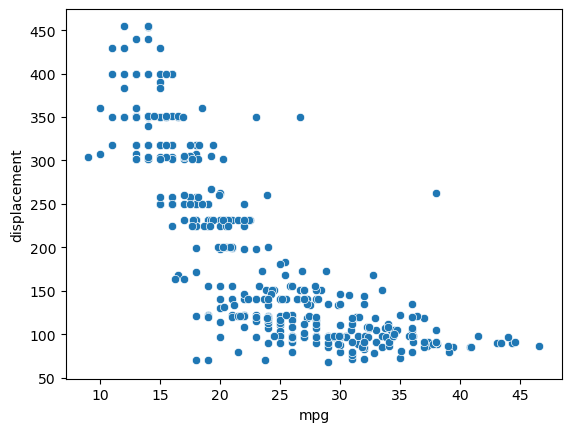

In [19]:
# correlation between mpg and displacement
sns.scatterplot(data=df, x='mpg', y='displacement')

<Axes: xlabel='horsepower', ylabel='mpg'>

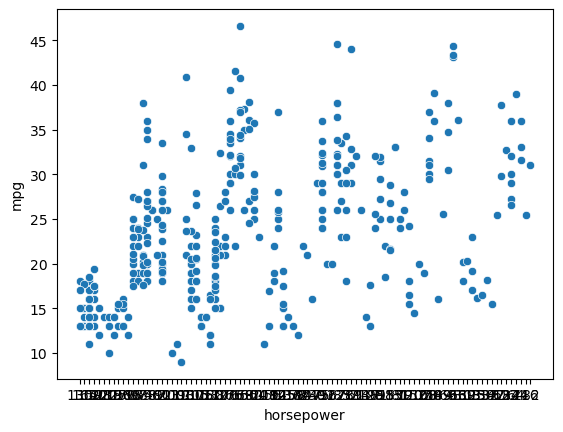

In [ ]:
# correlation between horsepower and mpg
sns.scatterplot(data=df, x='horsepower', y='mpg')

In [ ]:
# but horsepower have some problems - we can see that it is supposed to be a numerical column but it has object dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [22]:
df['horsepower'].head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [23]:
# lets check for non-numeric values in horsepower
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [24]:
# notice the '?' - we have a good eye to spot such issues bt it could be hard to spot in a large dataset
# so lets create a function to spot non-numeric values in a column
def find_non_numeric_values(series):
    non_numeric = []
    for value in series:
        try:
            float(value)
        except ValueError:
            non_numeric.append(value)
    return set(non_numeric)

find_non_numeric_values(df['horsepower'])

{'?'}

In [37]:
# lets check how many problematic values we have
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [38]:
print(f'Number of problematic values: {len(df[df["horsepower"] == "?"])}')

Number of problematic values: 5


In [39]:
# lets find the median of horsepower excluding the problematic values
df[df['horsepower'] != '?']['horsepower'].astype(float).median()

93.5

In [40]:
# now we can replace the problematic values but the strategy depends on the context
df['horsepower'] = df['horsepower'].replace('?', 93.5)

In [ ]:
# lets check if we have any problematic values left
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


In [ ]:
# now lets check the dtype of horsepower
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [44]:
# lets convert horsepower to numeric

# this is one way of doing it
#df['horsepower'] = pd.to_numeric(df['horsepower'])

# this is another way of doing it
df['horsepower'] = df['horsepower'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [46]:
df[['mpg', 'horsepower']].corr()

,mpg,horsepower
mpg,1.000000,-0.773582
horsepower,-0.773582,1.000000


<Axes: xlabel='horsepower', ylabel='mpg'>

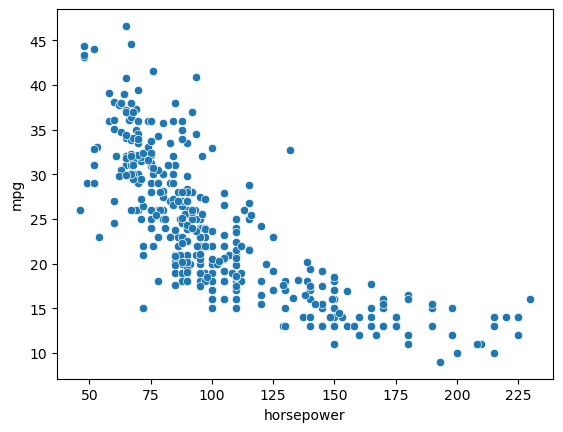

In [45]:
# now lets check the correlation between horsepower and mpg again
sns.scatterplot(data=df, x='horsepower', y='mpg')

In [ ]:
# as we can see the correlation is much clearer now
# it is important to always check the data types of the columns before doing any analysis
# scatter plots are very useful to visualize correlations between two numerical variables